In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.11.1


In [3]:
#zbiór danych MNIST
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#normalizacja danych
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
#budowa modelu sieci neuronowej
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2938 - accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1435 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1059 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0876 - accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0739 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0643 - accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0572 - accuracy: 0.9810
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0512 - accuracy: 0.9837
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0471 - accuracy: 0.9841
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss:

In [10]:
#ocena modelu
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"strata: {test_loss}")
print(f"dokładnośc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9791
strata: 0.07139042764902115
dokładnośc: 0.9790999889373779


In [11]:
import matplotlib.pyplot as plt

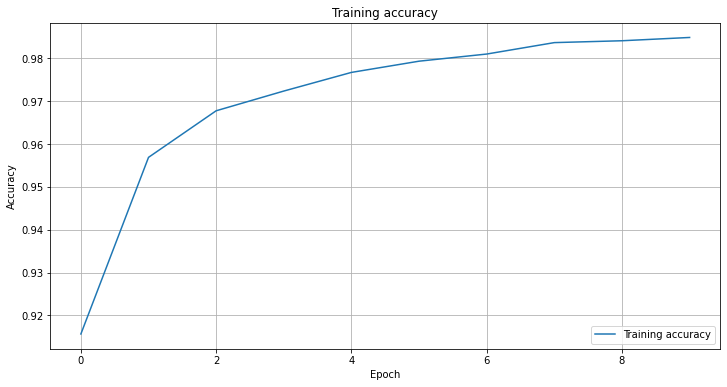

In [12]:
acc = history.history['accuracy']
epochs = range(len(acc))

plt.figure(figsize=(12,6))
plt.plot(epochs,acc,label="Training accuracy")
plt.title("Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

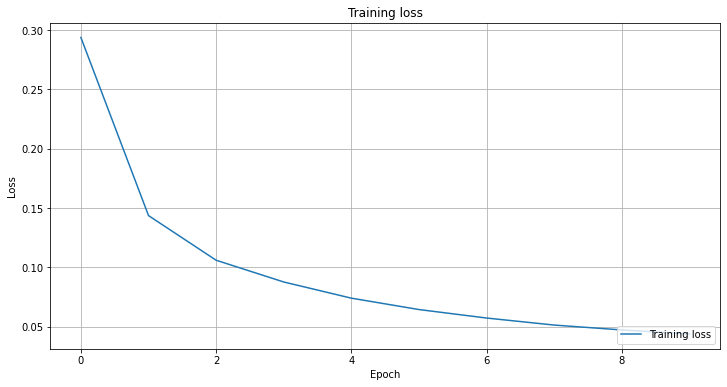

In [13]:
acc = history.history['loss']
epochs = range(len(acc))

plt.figure(figsize=(12,6))
plt.plot(epochs,acc,label="Training loss")
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()